#  Quantum Computing

<br>

***

## Introduction to Quantum Computing 

***

In this notebook I am going to explore some of the ideas behind Quantum Computing, the topics I will look at are:
1. What is Quantum Computing and what is it useful for?
2. Quantum Gates
3. Deutsch Algorithm
4. Oracles and Random Oracles

***

## What is Quantum Computing and what is it useful for?

***

Quantum computing is a type of computing that uses the quantum-mechanical phenomena. This includes using superposition and entanglement in order to perform operations on data. Quantum computers have the potential to solve problems at a much faster rate than classic computers, especially problems that involve searching through a lot of data or problems that generally require high computational power.

Here are some potential uses for Quantum Computers:
- Optimizing financial portfolios
- Modeling the behavior of molecules so we can design new drugs easier and faster
- Searching large databases at an extremely fast rate
- Optimizing supply chain logistics
- Improving machine learning algorithms, which would result in development of more advance AI systems
- Eventually being able to simulate the behavior of complex systems, such as the weather or even the human brain

While these would all be amazing things to have, the fact is quantum computers are still in the very early stages of development. There are researchers working on building practical quantum computers and improving their capabilities with the hopes that these applications above could one day be reality. One of the major companies involved in quantum research and development is IBM.

Ref - https://www.ibm.com/topics/quantum-computing

***

## Quantum Gates

***

Quantum gates are what essentially makes up quantum circuits, which perform operations on quantum states. Quantum gates are analogous to classical gates, which perform operations on classic bits in classic computers. One notable thing about the quantum gates is that they are reversible unlike classic gates.

Quantum gates work on qubits. These are basically quantum classical bits. Much the same as classical bits qubits can be in one of two state known as "0" or "1". However the qubits can also put itself it a superposition of these states, this means it can operate in both states simultaneously. Quantum gates manipulate these states, allowing the circuits to perform far more complex operations than classical circuits.

There are many different types of quantum gates, these include single-qubit and multi-qubit gates. Single qubit gates operate like that name suggests, on a single qubit, meanwhile multi-qubit gates can operate on two or more qubits at the same time.

Some examples of quantum gates are the Pauli X, Y, Z gates and the Hadamard gate.

Ref - https://en.wikipedia.org/wiki/Quantum_logic_gate

### Examples of Quantum Gates using Qiskit

##### X Gate Example
The X gate, also known as the NOT gate is a quantum gate that flips the state of a qubit. If the qubit is in the state |0>, the X gate will flip it to the state |1>, and if it is in the state |1>, the X gate will flip it to the state |0>.

In [1]:
# if the following gate examples don't show this may be because qiskit or pylatexenc is not installed
# if this is the case uncomment these and restart and run the kernal
#!pip install qiskit
#!pip install pylatexenc


In [2]:
# Quantum Circuits and Simulators.
import qiskit

# Qiskit Visualisation.
import qiskit.visualization as viz

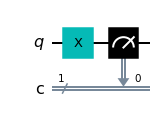

In [3]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.x(0)

# Measure.
circuit.measure(0, 0)

# Draw the circuit
circuit.draw(output='mpl')

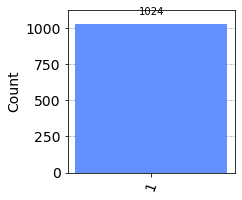

In [4]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(3, 3))

##### Y Gate Example
The Y gate is responsible for rotating a qubit state around the Y-axis in the Bloch sphere. The Y gate does this by flipping the phase of the |0> state relative to the |1> state. If the qubit is in state |0>, the Y gate will rotate it to state (|0> + i|1>)/√2, and if it is in state |1>, the Y gate will rotate it to state (|0> - i|1>)/√2.

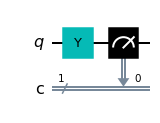

In [5]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.y(0)

# Measure.
circuit.measure(0, 0)

# Draw the circuit
circuit.draw(output='mpl')

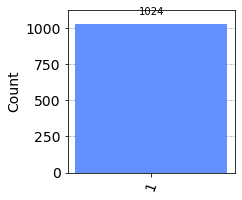

In [6]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulte the circuit.
result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(3, 3))

##### Z Gate Example
The Z gate is responsible for rotating a qubit state vector around the Z-axis in the Bloch sphere. The Z gate has the effect of flipping the phase of the |1> state relative to the |0> state. If the qubit is in the state |0>, the Z gate will leave it unchanged, and if it is in the state |1>, the Z gate will rotate it to the state -|1>.

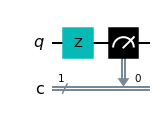

In [7]:
# Create a circuit.
circuit = qiskit.QuantumCircuit(1, 1)

# Add a gate.
circuit.z(0)

# Measure.
circuit.measure(0, 0)

# Draw the circuit
circuit.draw(output='mpl')

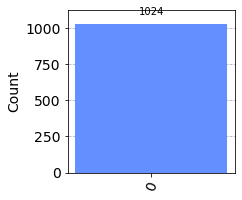

In [8]:
# Get a simulator.
sim = qiskit.Aer.get_backend('aer_simulator')

# Simulate the circuit.

result = sim.run(circuit).result().get_counts()

# Histogram.
viz.plot_histogram(result, figsize=(3, 3))

Refs - https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/05-quantum-computing.ipynb
https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli_gates_(X,Y,Z)

***

## Deutsch Algorithm

***

The Deutsch algorithm was invented by David Deutsch in 1985. It was a quantum algorithm that demonstrated the power that quantum computers could potentially have compared to classical computers. It is an example of a black box algorithm, this means that it will take a fucntions as an input and determine whether the function is balanced or constant, without even knowing what the function is for or how it is implemented.

The algorithm works like this:
1. A function is inputted to the algorithm which takes a single bit and returns a single bit. The function can be either constant which means it will always return the same output or it could be balanced, which means it returns 0 half the time and 1 half the time.
2. The algorithm goes into a quantum state called superposition, this state is a linear combination of all possible inputs to the function.
3. The algorithm applies the function to the superposition using a quantum gate called the Oracle gate.
4. The algorithm measures the output of the function to determine whether it is constant or balanced.

The Deutsch algorithm can determine if a function is constant or balanced in just one evaluation, compared to a classical computer that might require two evaluations in the worst case. This demonstrates the potential of quantum computers to perform certain tasks more efficiently than classical computers.

Ref - https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

In [9]:
import random
import itertools

In [10]:
def f1(x):
    if x == 0:
        return 0
    else:
        return 0

In [11]:
def f2(x):
    if x == 0:
        return 0
    else:
        return 1

In [12]:
def f3(x):
    if x == 0:
        return 1
    else:
        return 0

In [13]:
def f4(x):
    if x == 0:
        return 1
    else:
        return 1

In [14]:
L = [f1, f2, f3, f4]

In [15]:
f = random.choice(L)

In [16]:
f(0)

1

In [17]:
f(1)

0

In [18]:
f

<function __main__.f3(x)>

In [19]:
list(itertools.product([0,1], repeat=3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [20]:
list(itertools.product([0,1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [21]:
def random_f():
    possible_Ls = list(itertools.product([0,1], repeat=2))
    L = random.choice(possible_Ls)
    def f(x):
        return L[x]
    return f

In [22]:
f = random_f()

In [23]:
f(0)

0

In [24]:
f(1)

1

Ref - https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/05-quantum-computing.ipynb

***

## Oracles and Random Oracles

***

***

## End of Notebook